# 호텔 예약 수요 분석(Hotel reservation demand Analysis)

## 문제 상황  

A호텔은 요즘 코로나 여파로 인하여 고생을 겪고 있다. 객실 예약 건수도 줄고 있는 마당에 노쇼/취소 고객도 증가있는 것이 가장 큰 문제이다.  
캔슬 고객은 그나마 다행이지만 노쇼 고객의 경우 객실을 하루 날려버리는 것과 같아서, 비용적인 문제에서도 큰 영향을 끼치고 있다. 따라서 노쇼와 취소고객을 사전 예측하고, 운영 비용을 상황에 맞춰 조정하려고 한다.

## 문제 해결 프로세스  

1. 문제정의

- 노쇼/취소 고객 증가로 인한 영업이익 감소

2. 기대효과

- 노쇼/취소 고객 손실 비용 절감, 영업이익 증가

3. 해결방안

- 노쇼/취소 고객 예측 모델로 고객을 예측하고, 운영 비용 조정 

4. 성과측정

- 모델 활용 노쇼/취소 고객 관리 전/후 손실비용 비교 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/호텔 예약 수요 분석/호텔 예약 수요 분석.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))

총 결측치 수: 129425 = 전체 데이터의 3.39%


#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 children, country, agent, company 변수에서 결측치가 존재한다.

- 결측치의 개수는 전체 5% 채 되지 않는 129425개이다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

- 하지만, 결측치의 개수가 전체 데이터에 비해 너무 적기 때문에 제거하는 것이 좋아보이나 변수의 특성상 대체하는 것이 좋을 듯 하다.

2. 데이터 타입 설명

- 종속변수는 object형태, 독립변수는 object, int64, float64형태로 구성되어 있다. 독립변수 object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다.  

3. 컬럼 설명

- hotel : 호텔명
- is_canceled : 취소여부
- lead_time : 입실까지 남은일
- arrival_date_year : 년
- arrival_date_month : 월
- arrival_date_week_number : 일
- arrival_date_day_of_month : 일
- stays_in_weekend_nights : 주말여부
- stays_in_week_nights : 평일여부
- adults : 성인
- children : 어린이
- babies : 영유아
- meal : 식사
- country : 나라
- market_segment : 예약유통채널상세
- distribution_channel : 예약유통채널
- is_repeated_guest : 기존고객여부
- previous_cancellations : 과거 취소한 예약수
- previous_bookings_not_canceled : 과거 취소하지않은 예약수
- reserved_room_type : 예약객실타입
- assigned_room_type : 배정된객실타입
- booking_changes : 예약변경횟수
- deposit_type : 보증금여부
- agent : 여행사ID
- company : 예약지불회사
- days_in_waiting_list : 대기자 명단에 있었던 일수
- customer_type : 계약타입
- adr : 평균객실비용
- required_car_parking_spaces : 요구주차대수
- total_of_special_requests : 특별요청수
- reservation_status : 예약상태
- reservation_status_date : 예약상태 업데이트 날짜

In [5]:
df['children'].fillna(0, inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [6]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

고객이 기입을 안하고 예약하는 경우도 있기 때문에 결측치 삭제 대신 0이나 none으로 대체한다

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [8]:
df_n = df.select_dtypes(exclude = 'object')

In [9]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,is_canceled,0.0
1,is_canceled,0.0
2,is_canceled,0.0
3,is_canceled,0.0
4,is_canceled,0.0
...,...,...
2387795,total_of_special_requests,0.0
2387796,total_of_special_requests,2.0
2387797,total_of_special_requests,4.0
2387798,total_of_special_requests,0.0


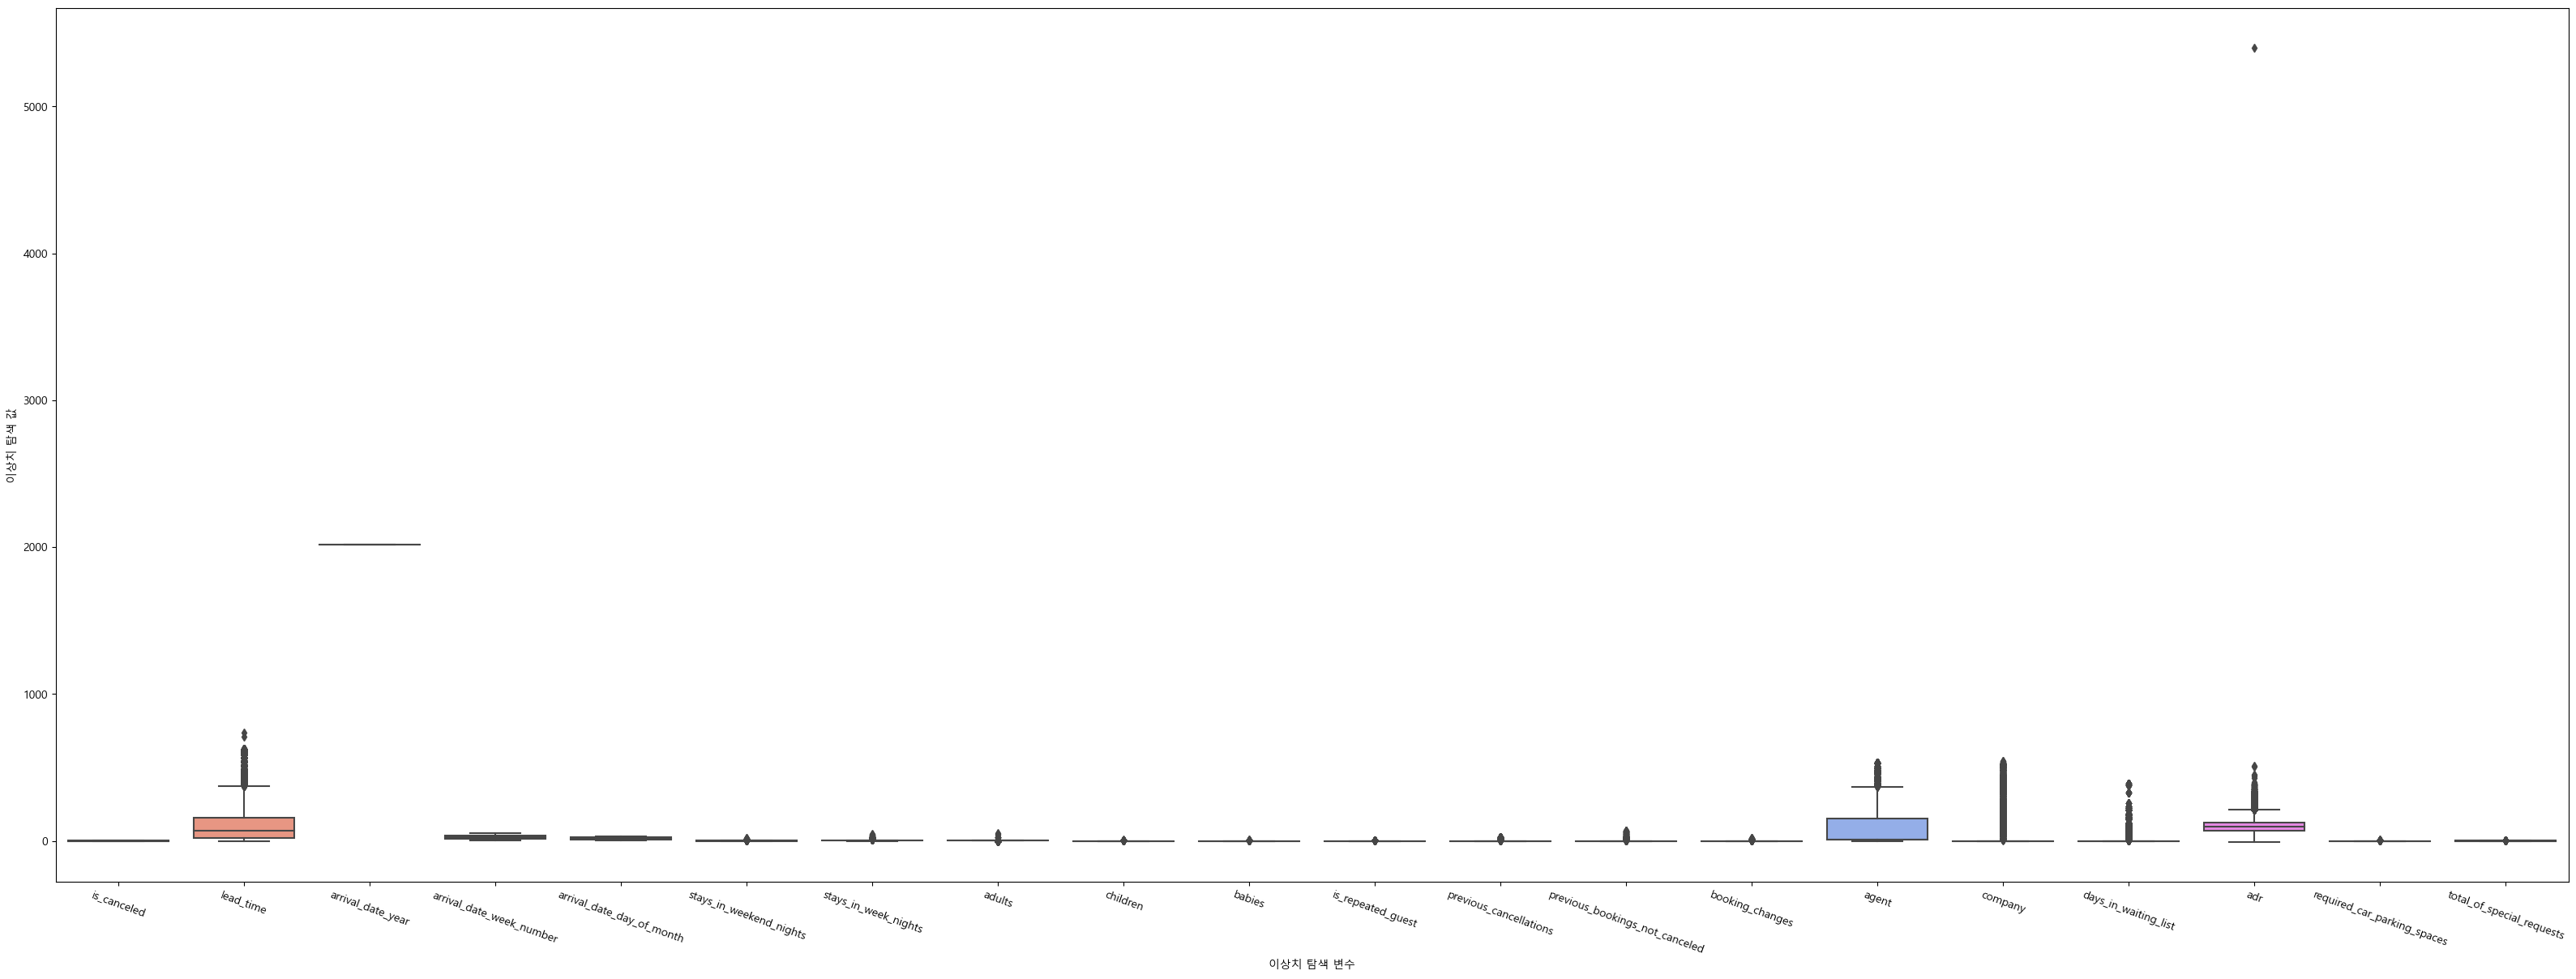

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (40,14))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(rotation =-20);
plt.xticks(range(20), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다. adr 변수는 비용이기 때문에 음수값만 제거해준다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [12]:
df=df[df['adr']>0]

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.00000,117430.000000,117430.000000,117430.000000,117430.000000
mean,0.374785,105.084340,2016.160274,27.136779,15.802819,0.936422,2.521221,1.860632,0.104505,0.007869,0.027872,0.086954,0.125334,0.216486,75.177348,10.54716,2.337937,103.530818,0.062642,0.571038
std,0.484069,106.907012,0.706565,13.575680,8.783582,0.995760,1.893742,0.482102,0.399690,0.097168,0.164607,0.848690,1.446204,0.633188,107.235820,53.54574,17.677053,49.198721,0.245565,0.791655
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.00000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.00000,391.000000,5400.000000,8.000000,5.000000


### 객실 수요 파악

In [14]:
df['arrival_date_year'].value_counts()

2016    55789
2017    40231
2015    21410
Name: arrival_date_year, dtype: int64

년도별 객실 예약 현황을 살펴보면 2016년에 가장 수요가 많다

In [15]:
df['arrival_date_month'].value_counts()

August       13711
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9641
February      7921
November      6641
December      6561
January       5801
Name: arrival_date_month, dtype: int64

월별 객실 예약 현황을 살펴보면 8월이 가장 수요가 많다

In [16]:
df_reservation = pd.DataFrame(df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['hotel'].count())
df_reservation.head(10)

,arrival_date_year,arrival_date_month,hotel
0,2015,August,3794
1,2015,December,2795
2,2015,July,2714
3,2015,November,2274
4,2015,October,4824
5,2015,September,5009
6,2016,April,5346
7,2016,August,5020
8,2016,December,3766
9,2016,February,3820


In [17]:
df_reservation = df_reservation.replace({'January' : '01.January',
                                         'February' : '02.February',
                                         'March' : '03.March',
                                         'April' : '04.April',
                                         'May' : '05.May',
                                         'June' : '06.June',
                                         'July' : '07.July',
                                         'August' : '08.August',
                                         'September' : '09.September',
                                         'October' : '10.October',
                                         'November' : '11.November',
                                         'December' : '12.December'})
df_reservation.head(5)

,arrival_date_year,arrival_date_month,hotel
0,2015,08.August,3794
1,2015,12.December,2795
2,2015,07.July,2714
3,2015,11.November,2274
4,2015,10.October,4824


replace 함수를 활용하여 월 데이터를 재정의한다

In [18]:
df_reservation = df_reservation.sort_values(by=['arrival_date_year','arrival_date_month'])
df_reservation

,arrival_date_year,arrival_date_month,hotel
2,2015,07.July,2714
0,2015,08.August,3794
5,2015,09.September,5009
4,2015,10.October,4824
3,2015,11.November,2274
1,2015,12.December,2795
10,2016,01.January,2183
9,2016,02.February,3820
13,2016,03.March,4739
6,2016,04.April,5346


2015년은 7월부터 데이터 존재, 2016년은 12개월 모두 존재, 2017년은 1~8월까지만 존재하는 것을 확인할 수 있다

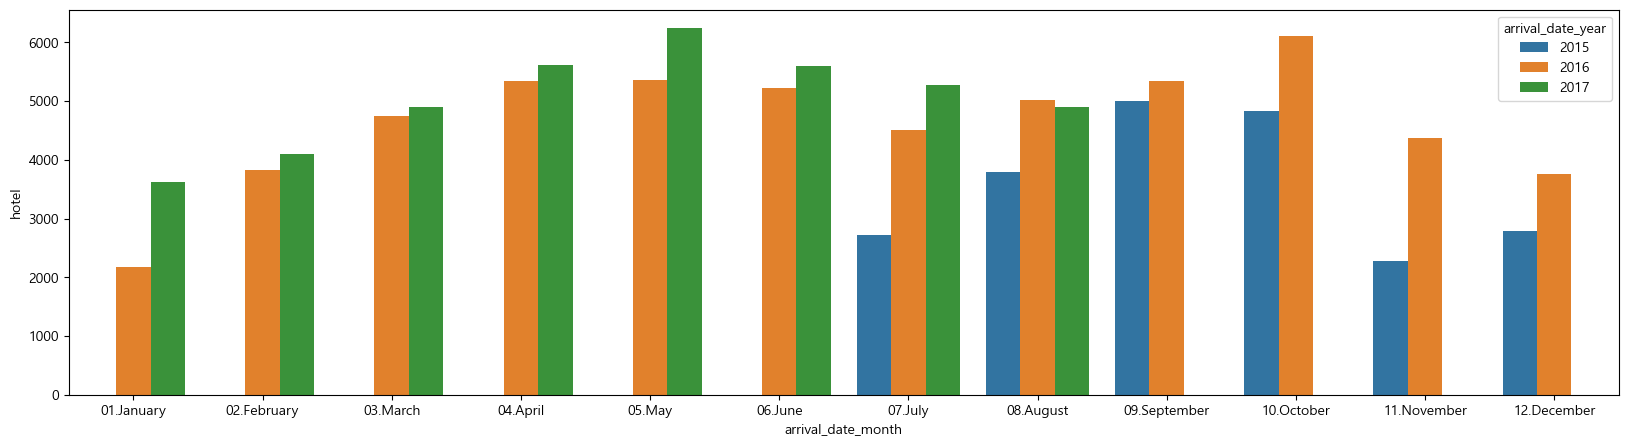

In [19]:
sns.barplot(x='arrival_date_month', y='hotel', hue='arrival_date_year', data = df_reservation,
            order = ['01.January', '02.February', '03.March', '04.April', '05.May', '06.June', '07.July', '08.August', '09.September', '10.October', '11.November', '12.December']);
plt.gcf().set_size_inches(20, 5);

8월을 제외하고 나머지 월은 년도가 올라갈수록 수요도 증가하는 것을 알 수 있다

## 취소고객, 노쇼 고객 분석

In [20]:
df['reservation_status'].value_counts()

Check-Out    73419
Canceled     42830
No-Show       1181
Name: reservation_status, dtype: int64

In [28]:
print('평균 취소 비율 :', 42830 / (73419 + 42830 + 1181)*100)


print('평균 노쇼 비율 :', 1181 / (73419 + 42830 + 1181)*100)

평균 취소 비율 : 36.472792301796815
평균 노쇼 비율 : 1.0057055266967554


In [22]:
import numpy as np
df['reservation_status'] = np.where(df['reservation_status'] != 'Check-Out', 1, 0)
df['reservation_status'].value_counts()

0    73419
1    44011
Name: reservation_status, dtype: int64

취소, 노쇼에 대한 데이터를 1로 변경해준다

In [27]:
print('평균 취소 + 노쇼 비율 :', 44011 / (73419 +44011)*100)

평균 취소 + 노쇼 비율 : 37.47849782849357


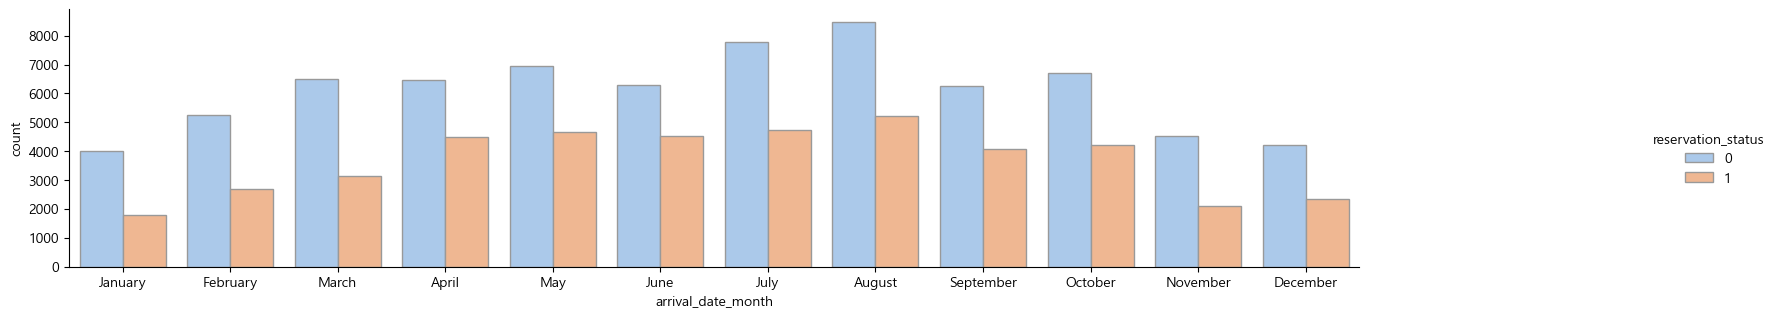

In [24]:
sns.catplot(x="arrival_date_month", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df,
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
plt.gcf().set_size_inches(20, 3)

In [25]:
df_gp = df.groupby('arrival_date_month')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
arrival_date_month,,,
June,10819,4523,41.8
April,10953,4504,41.1
May,11611,4659,40.1
September,10351,4092,39.5
October,10929,4209,38.5
August,13711,5228,38.1
July,12491,4723,37.8
December,6561,2355,35.9
February,7921,2676,33.8


월에 따른 취소/노쇼율을 비교한 결과, 6월이 가장 높은 것을 알 수 있다

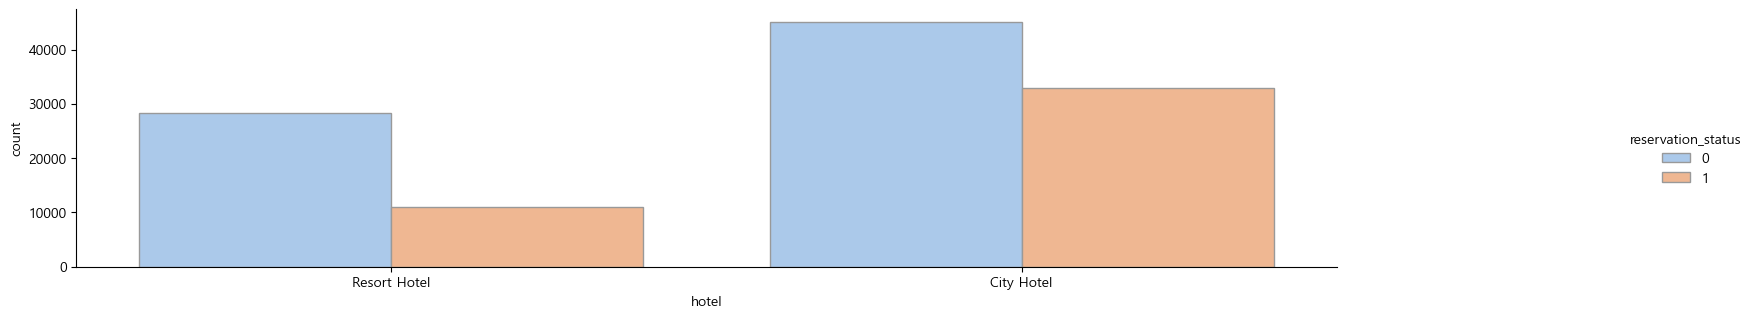

In [26]:
sns.catplot(x="hotel", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [29]:
df_gp = df.groupby('hotel')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
hotel,,,
City Hotel,78122,32973,42.2
Resort Hotel,39308,11038,28.1


Resort Hotle과 City Hotel을 비교한 결과, City Hotel 취소/노쇼율이 더 높은 것을 알 수 있다

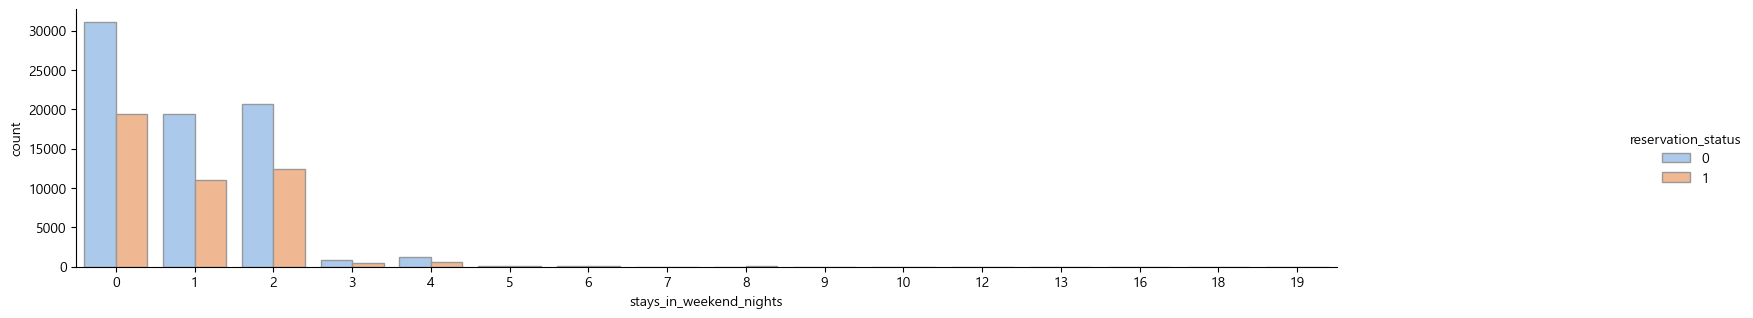

In [30]:
sns.catplot(x="stays_in_weekend_nights", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [31]:
df_gp = df.groupby('stays_in_weekend_nights')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
stays_in_weekend_nights,,,
9,9,7,77.8
7,19,14,73.7
8,57,34,59.6
6,152,87,57.2
5,77,43,55.8
0,50499,19361,38.3
2,33150,12453,37.6
1,30361,10967,36.1
3,1244,444,35.7


주말 예약 일수에 따라 비교한 결과, 9일이 가장 높은 것을 알 수 있다. 하지만, 차원이 너무 많은 관계로 구간화를 진행하는 것이 좋아보인다

In [32]:
df_c = df.copy()

df_c['gp'] = np.where(df_c['stays_in_weekend_nights'] <= 2, 1,
                      np.where(df_c['stays_in_weekend_nights'] <= 8, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,27,11,40.7
1,114010,42781,37.5
2,3393,1219,35.9


주말 예약 일수에 따른 비교를 다시 한 결과, gp3(9~19일)가 가장 높은 것을 알 수 있다

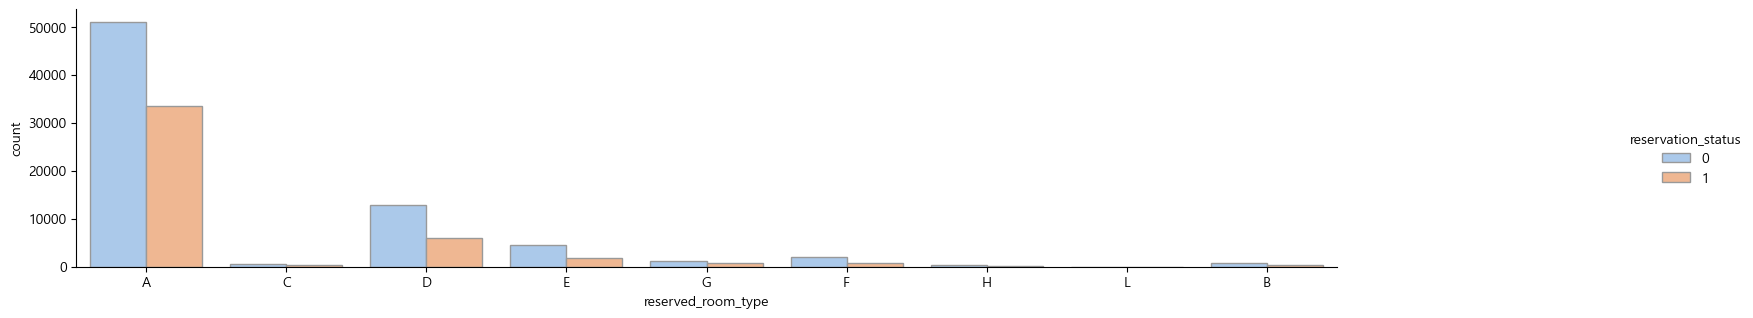

In [34]:
sns.catplot(x="reserved_room_type", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [35]:
df_gp = df.groupby('reserved_room_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
reserved_room_type,,,
H,595,245,41.2
A,84573,33477,39.6
G,2006,756,37.7
B,1085,365,33.6
C,913,306,33.5
L,6,2,33.3
D,19005,6086,32.0
F,2824,873,30.9
E,6423,1901,29.6


객실타입에 따른 비교를 한 결과, H객실타입이 가장 높은 것을 알 수 있다

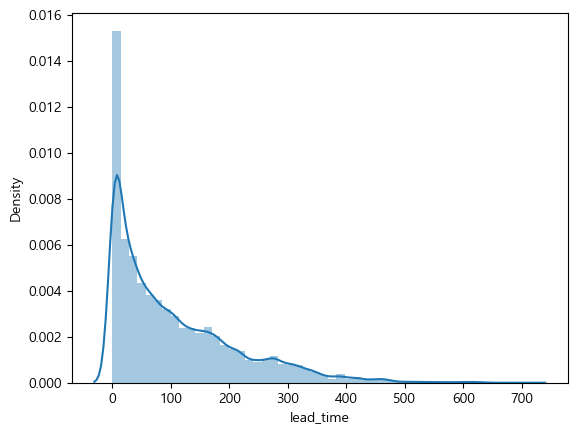

In [36]:
sns.distplot(df['lead_time']);

In [37]:
df_c = df.copy()
df_c['gp'] = np.where(df['lead_time'] <= 100, 1,
                       np.where(df['lead_time']<=200, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,20526,12182,59.3
2,26586,11987,45.1
1,70318,19842,28.2


입실까지 남은일에 따른 비교를 한 결과, gp3(201일~)가 가장 높은 것을 알 수 있다

## ML 활용 취소/노쇼 고객 예측

In [42]:
numeric_list=[]
categoical_list=[]

for i in df.columns :
    if df[i].dtypes == 'O' :
        categoical_list.append(i)
    else :
        numeric_list.append(i)

print("categoical_list :", categoical_list)
print("")
print("numeric_list :", numeric_list)

categoical_list : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']

numeric_list : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


수치형 변수(numeric_list), 범주형 변수(categoical_list)로 나눠준다

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['is_canceled', 'reservation_status_date', 'reservation_status'], axis=1)
Y=df['reservation_status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(82201, 29)
(82201,)
(35229, 29)
(35229,)


- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다

In [44]:
categoical_list.remove('reservation_status_date')

모델링에 사용하지 않을 범주형 변수는 리스트에서 제외한다

In [45]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type


범주형 변수는 One-hot-encoding 또는 Label-encoding을 통해 숫자형 변수로 변경해야한다. One-hot-encoding은 차원이 많은 변수에는 적절하지 않고, Label-encoding은 차원이 많은 변수에 적절하다

In [46]:
x_test[categoical_list].head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
62192,0,4,3,25,6,3,0,0,0,2
78804,0,10,0,153,5,3,0,0,0,3
32042,1,4,0,76,6,3,3,3,0,2
71648,0,5,0,135,4,3,0,0,1,2
45333,0,10,2,56,5,3,1,1,0,3


In [48]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 2023, max_depth=6)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     51393
           1       0.94      0.46      0.62     30808

    accuracy                           0.79     82201
   macro avg       0.85      0.72      0.74     82201
weighted avg       0.82      0.79      0.77     82201

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     22026
           1       0.94      0.47      0.62     13203

    accuracy                           0.79     35229
   macro avg       0.85      0.72      0.74     35229
weighted avg       0.82      0.79      0.77     35229



In [49]:
pd.Series(y_pred_test).value_counts()

0    28710
1     6519
dtype: int64

1. precision  

- 예약 취소/노쇼를 할 것 같은 고객들을 예측한 고객들 중에서 실제로 예약 취소/노쇼를 한 고객의 확률(예측한 것 중에 실제로 정답인 비율)

- 장점 : 최대한 많은 예약 취소/노쇼 고객들을 후보리스트로 만들어서 관리가 가능하며, 손실 방어가 가능하다

- 단점 : 실제로 그렇지 않은 고객들이 포함될 수 있다


2. recall  

- 실제로 예약 취소/노쇼를 한 고객들중에서 예약 취소/노쇼 예측을 맞춘 확률(실제 정답 중에서 예측으로 맞춘 비율)

- 장점 : 실제로 예약 취소/노쇼를 할 것 같은 고객들만 관리할 수 있다

- 단점 : 예약 취소/노쇼 고객들이 적어서 모수가 작아지기 때문에 손실이 늘어날 우려가 있다

3. support

- 6519명 중에 94%를 맞춘 것(precision)

- 13203명 중에 47%를 맞춘 것(recall)

In [50]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9106561626101233
roc_score_test : 0.9096803610234196


4. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 거의 비슷하므로 과적합이 발생하지 않았다고 할 수 있다.

5. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

6. predict_proba

- 0일 확률과 1일 확률로 나누는 것

- [:, 1]의 의미는 전체 고객을 불러오기 위해 행을 :, 예약 취소/노쇼 고객들의 확률만 추출하기 위해 2번째에 있는 열인 1을 불러온다는 의미이다.

- 1번째에 있는 열은 예약 취소/노쇼를 하지 않은 고객들의 확률이다.

In [51]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

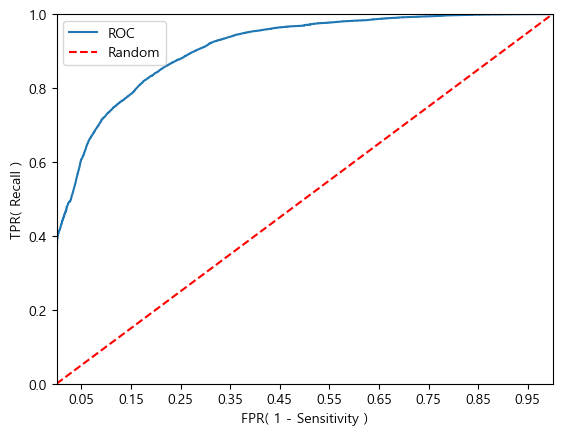

In [52]:
roc_curve_plot(y_train, y_pred_train_proba)

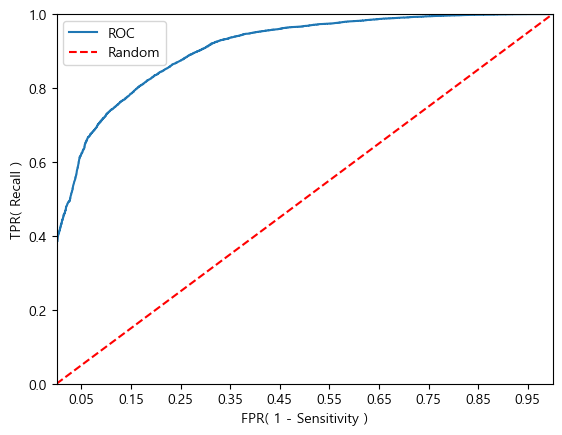

In [53]:
roc_curve_plot(y_test, y_pred_test_proba)

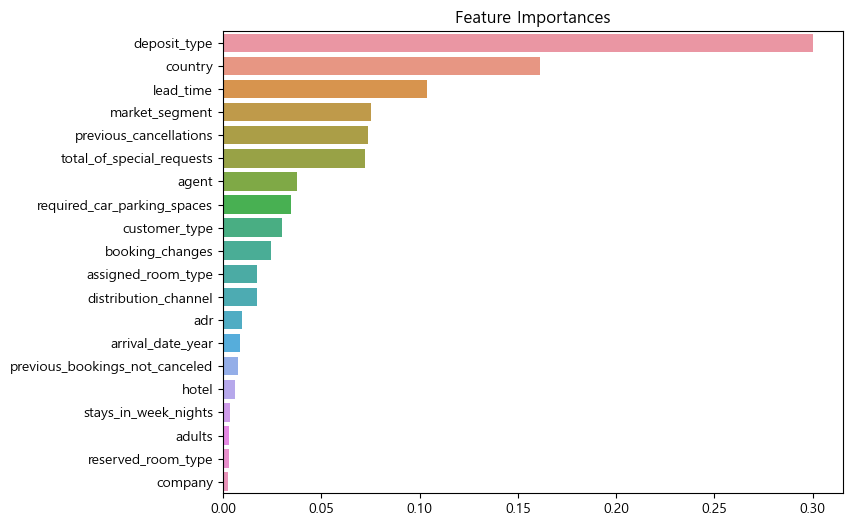

In [54]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수를 살펴보면, deposit_type(보증금여부)이 예약 취소/노쇼를 예측하는데 가장 중요한 변수임을 확인할 수 있다. 하지만, stays_in_week_nights부터 하위 변수들은 예측에 거의 영향을 주지 않는 것을 알 수 있다. 따라서 deposit_type(보증금여부)을 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

stays_in_week_nights부터 하위 변수들은 제거하고 다시 모델링 해보는 것도 좋다

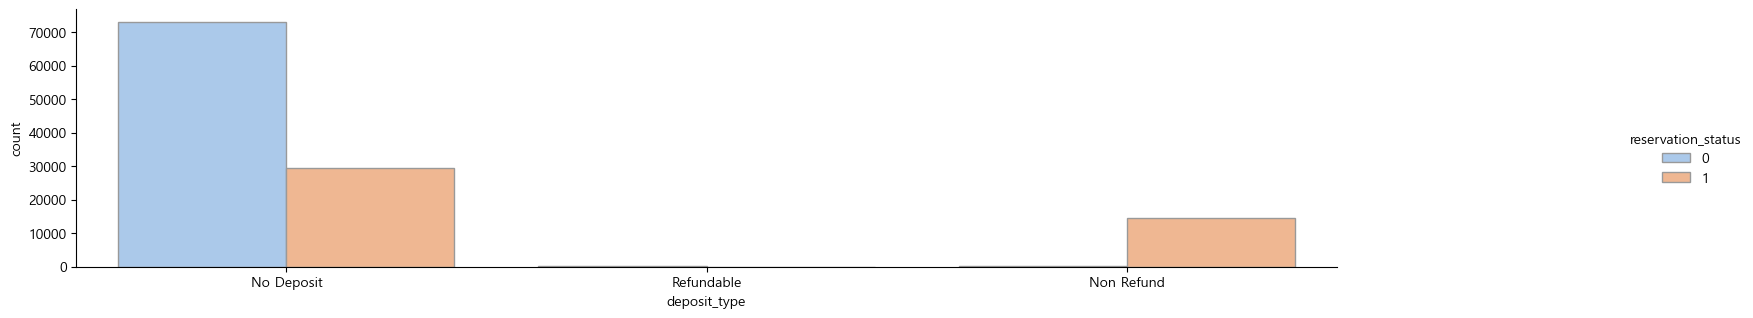

In [55]:
sns.catplot(x="deposit_type", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [56]:
df_gp = df.groupby('deposit_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
deposit_type,,,
Non Refund,14587,14494,99.4
No Deposit,102681,29481,28.7
Refundable,162,36,22.2


가장 중요한 변수에 대해 상세한 탐색을 실시한다.  deposit_type(보증금여부)의 분포를 확인한다. Non Refund(환불불가)가 예약 취소/노쇼 확률이 급격히 상승하는 것을 확인할 수 있다. 가장 중요한 변수임을 알 수 있고, 매우 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 모델을 활용해서 예약 취소/노쇼 고객들을 관리 전/후 손실비용을 비교하는 것이다.

ex) 예약 취소/노쇼 예측 고객 = Non Refund(환불불가)의 고객들